<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Batch10/Intro_to_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression
===
if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon based on its age and weight.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Simple Linear Regression
We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
>y=ax+b

where **a** is commonly known as the slope, and **b** is commonly known as the intercept while **y** is the dependent (target) and **x** is the independent(feature) variable/s

Let's generate a random dataset of points scattered about a line with a slope of 2 and an intercept of -5 or y = 2x - 5:

In [ ]:
#generate random points scattered around y = 2x - 5
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) #let's generate some random numbers of x
y = 2 * x - 5 + rng.randn(50) #let's plug the x values to y=ax+b

#let's create a dataframe to display this dataset
tmp_df = {}
tmp_df['x'] = x
tmp_df['y'] = y
print(pd.DataFrame(tmp_df).head()) #display the first values of the dataset

          x         y
0  4.170220  2.653267
1  7.203245  8.561284
2  0.001144 -5.668959
3  3.023326  1.033987
4  1.467559 -3.182193


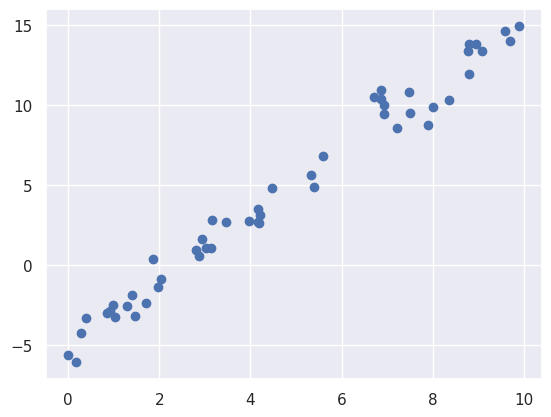

In [ ]:
#this is what it looks like (clue: it looks linear!)
plt.scatter(tmp_df['x'],tmp_df['y']);


### Gameplan (for linear regression)

We will follow the following steps for linear regression, but it is also applicable when using Scikit-Learn.

1.  Import the appropriate estimator class from Scikit-Learn. To import linear regression, type the following below:

> from sklearn.linear_model import LinearRegression

2.  Choose model hyperparameters by instantiating this class with desired values.

> model = LinearRegression(fit_intercept=True)

3.  Arrange data into a features matrix and target vector following the discussion above.

4.  Fit the model to your data by calling the  `fit()`  method of the model instance.

5.  Apply the Model to new data:
    -   Since linear regression is under supervised learning,  we predict labels for unknown data using the `predict()`  method.

## Let's try it!
We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

### Univariate (one variable)

1.  Import the appropriate estimator class from Scikit-Learn.

2.  Choose model hyperparameters by instantiating this class with desired values.

In [ ]:
#1. import linear regression
from sklearn.linear_model import LinearRegression #implements ordinary least squares

#2. choose model hyperparameters
model = LinearRegression(fit_intercept=True)


3.  Arrange data into a features matrix and target vector following the discussion above.

In [ ]:
#3. arrange data into a features matrix and target vector
x = tmp_df['x'].reshape(50,-1) # reshape the input x so that it is acceptable by the model (a matrix of 50 samples of 1 feature)
y = tmp_df['y']

print("before: ",tmp_df['x'][0:5])
print("after: ",tmp_df['x'].reshape(50,-1)[0:5])


before:  [4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00]
after:  [[4.17022005e+00]
 [7.20324493e+00]
 [1.14374817e-03]
 [3.02332573e+00]
 [1.46755891e+00]]


4.  Fit the model to your data by calling the  `fit()`  method of the model instance.

In [ ]:
#4. fit the model to the data
model.fit( x,y )

# Let's get some regression information

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

# Note not all regression models would be able to provide this information

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


5.  Apply the Model to new data

In [ ]:
# Test the model to predict from a single x-value

model.predict([[0]]) #use the model to predict the value of y for x = 0

#you can check this manually using the regression information above.

array([-4.99857709])

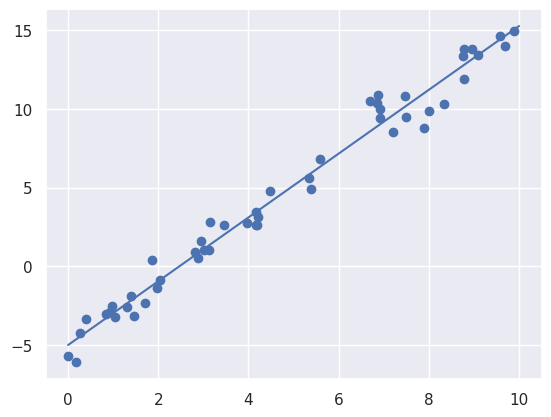

In [ ]:
# Let's test this model on a set of new x-values

xnew = np.linspace(0, 10, 50) #generate 50 numbers between 0 and 10 that are evenly spaced
ypred = model.predict(xnew.reshape(50,-1))

plt.scatter(x, y) #let's do a scatter plot of the original dataset
plt.plot(xnew, ypred); #plot new xs and predicted ys to see how it fits the scatterplot of the original dataset

# Check assumptions
Below is a short guide on checking if the assumptions for linear regression are satisfied:

- **Linear relationship** - linearity
scatter plots and correlation coefficient (r) for x and y should indicate a linear relationship

- **Multivariate normality** - histogram of residuals should follow a normal distribution

- **Homoscedasticity** - scatter plot of x and residuals should show no pattern

- **No auto-correlation** - observations should be independent from each other, i.e. one observation should not be affected by another observation

- **No or little multicollinearity** - for multiple linear regression, multicollinearity occurs when the independent variables are too highly correlated with each other.

-- WARNING - if any of the above items are violated, it would be hard to trust your LR results!

## Linear relationship
Let's check the scatter plot of x and y and correlation coefficient

array([[1.        , 0.98948475],
       [0.98948475, 1.        ]])

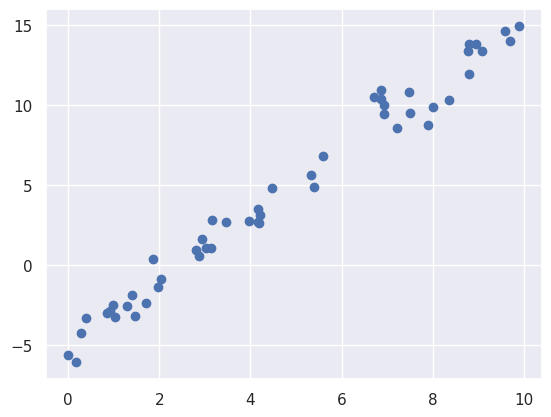

In [ ]:
plt.scatter(tmp_df['x'],tmp_df['y']);
x_corr = tmp_df['x']
y_corr = tmp_df['y']
np.corrcoef(x_corr,y_corr)

## Multivariate normality
Let's check if the residuals exhibit normality

(array([3., 2., 6., 1., 7., 8., 6., 9., 4., 4.]),
 array([-17.87369764, -14.77171336, -11.66972907,  -8.56774478,
         -5.4657605 ,  -2.36377621,   0.73820808,   3.84019237,
          6.94217665,  10.04416094,  13.14614523]),
 <BarContainer object of 10 artists>)

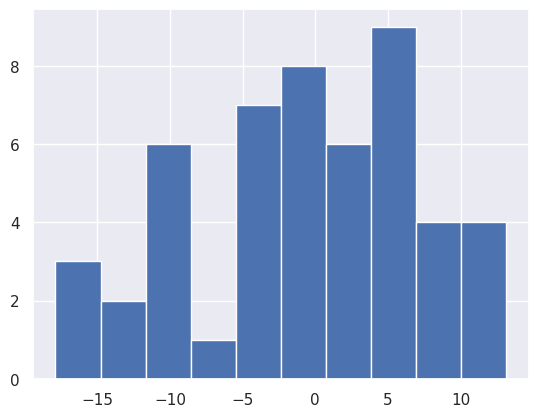

In [ ]:
# Residuals
residuals = y-ypred
type(residuals)

plt.hist(residuals)

## Homoscedascity
Let's see if the residual plot exhibits a pattern

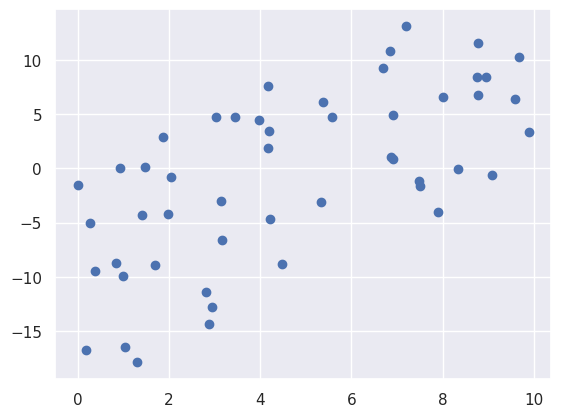

In [ ]:
plt.scatter(x_corr, residuals)

## Auto-correlation and Multicollinearity

- For auto-correlation, we can assume that each data point is independent from each other
- For multicollinearity, since there is only one independent variable, we do not need to check for multicollinearity

# Model Evaluation

Below are some notes for the metrics for evaluating the model:

- R - Squared: close to 1 is good
- MAE (Mean Absolute Error): close to 0 is good
- MSE (Mean Squared Error): close to 0 is good
- RMSE (Root Mean Squared Error): close to 0 is good



In [ ]:
import sklearn.metrics as metrics

yactual = 2 * xnew - 5 # let's compute our actual y based on the provided formula and compare to ypred
mae = metrics.mean_absolute_error(yactual, ypred) # closer to 0 is good.
mse = metrics.mean_squared_error(yactual, ypred) # closer to 0 is good.
rmse = np.sqrt(mse) # or mse**(0.5)  # closer to 0 is good.
r2 = metrics.r2_score(yactual,ypred)  # closer to 1 is good.

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.1374669662502729
MSE: 0.025318304126968325
RMSE: 0.15911726533273604
R-Squared: 0.9992702371163403


# Congrats! It's your first model. Notice anything?

Sklearn makes it so easy for anyone to do any type of prediction! (specially from a bunch of random numbers!).

Now, how do we ensure that the models we are developing are valid?

* Goodness of fit - is the model underfit/ overfit?
* Prediction accuracy - is the model able to predict accurately from unknown data?
* Usability - is the model designed in such a way that it is not too complex that it cannot be used

# Try it out!

Can you try predicting the age of a person using their salary?

Let's load and prepare the Salary Dataset.

In [ ]:
df = pd.read_excel("Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1_UPDATED (3).xlsx")
df = df.drop('Unnamed: 0', axis =1)
df.rename(columns={'Timestamp':'time',
                     'How old are you?': 'age',
                     'What industry do you work in?':'industry',
                     'Job title': 'job',
                     'If your job title needs additional context, please clarify here:':'job_others',
                     "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'annual_salary' , 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.' : 'addtl_compensation',
                     'Please indicate the currency': "currency",
                     'If "Other," please indicate the currency here: ': "currency_others",
                     'If your income needs additional context, please provide it here:': "income_addlcontext",
                     'What country do you work in?': "work_country",
                     "If you're in the U.S., what state do you work in?" : "US_state",
                     'What city do you work in?': "city",
                     'How many years of professional work experience do you have overall?': "yrs_exp",
                     'How many years of professional work experience do you have in your field?' : 'yrs_exp_field',
                     'What is your highest level of education completed?': "educ_level",
                     'What is your gender?': "gender",
                     'What is your race? (Choose all that apply.)' : "race"},
            inplace=True)
df['annual_salary'] = df['annual_salary'].str.replace(',', '')
df['annual_salary'] = df['annual_salary'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28042 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                28042 non-null  object 
 1   age                 28042 non-null  int64  
 2   industry            27968 non-null  object 
 3   job                 28041 non-null  object 
 4   job_others          7259 non-null   object 
 5   annual_salary       28042 non-null  float64
 6   addtl_compensation  20755 non-null  float64
 7   currency            28042 non-null  object 
 8   currency_others     202 non-null    object 
 9   income_addlcontext  3040 non-null   object 
 10  work_country        28042 non-null  object 
 11  US_state            23028 non-null  object 
 12  city                27960 non-null  object 
 13  yrs_exp             28042 non-null  int64  
 14  yrs_exp_field       28042 non-null  int64  
 15  educ_level          27823 non-null  object 
 16  gend

In [ ]:
df.describe() # check if there are any missing values

,age,annual_salary,addtl_compensation,yrs_exp,yrs_exp_field
count,28042.000000,2.804200e+04,2.075500e+04,28042.000000,28042.000000
mean,36.138649,1.475411e+05,1.816943e+04,23.323800,16.539583
std,9.322576,5.409978e+06,8.342741e+05,18.065223,17.326083
min,14.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,29.000000,5.400000e+04,0.000000e+00,7.000000,4.000000
50%,35.000000,7.500000e+04,2.000000e+03,21.000000,7.000000
75%,42.000000,1.100000e+05,1.000000e+04,43.000000,30.000000
max,85.000000,8.700000e+08,1.200000e+08,50.000000,50.000000


In [ ]:
#remove outliers
Q1c=df.annual_salary.quantile(0.25)
Q3c=df.annual_salary.quantile(0.75)
print('1stQ: ',Q1c, ' 2nsQ: ',Q3c)

IQRc = Q3c-Q1c
l=Q1c-1.5*IQRc
h=Q3c+1.5*IQRc

print(df.shape, l, h)
df1 = df[(df.annual_salary >l)&(df.annual_salary < h)]
print(df1.shape)

1stQ:  54000.0  2nsQ:  110000.0
(28042, 18) -30000.0 194000.0
(26853, 18)


Your turn: create a linear regression model predicting a person's age from their salary (Hint: you can follow the process earlier--steps are in the comments.)

In [ ]:
#1. import linear regression
from sklearn.linear_model import LinearRegression

#2. choose model hyperparameters
model = LinearRegression(fit_intercept=True)

#3. arrange data into a features matrix and target vector
x = df1[['annual_salary']]
y = df1[['age']]

#print(x.shape)
#print(y.shape)

#4. fit the model to the data
model.fit(x,y)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#5. predict the age for a salary of 100,000
model.predict([[100000]])

Model slope:     [4.19183722e-05]
Model intercept: [32.61548643]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36.80732365]])

# Multiple linear regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.

The method is broadly used to predict the behavior of the response variables associated to changes in the predictor variables, once a desired degree of relation has been established.

Let's use our Salary Dataset


## MODEL 0 (Baseline Model)
Lets use annual salary *and* years of experience to predict the age.

In [ ]:
#1. import linear regression
from sklearn.linear_model import LinearRegression #implements ordinary least squares

#2. choose model hyperparameters
model = LinearRegression()

#3. arrange data into a features matrix and target vector
x = df1[['annual_salary','yrs_exp']]
y = df1['age']





### Hold out method
how do we ensure that our model would be able to generalize where it can handle unknown data? aka prevent overfitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=53)

print("X_train data:",X_train.shape)
print("y_train data:",y_train.shape)
print("X_test data:",X_test.shape)
print("y_test data:",y_test.shape)

# now we have a test data that is "unknown" to the model that we can later use to compare if it was able to predict accurately

X_train data: (17991, 2)
y_train data: (17991,)
X_test data: (8862, 2)
y_test data: (8862,)


In [ ]:
model.fit( X_train,y_train ) #fit the model

LinearRegression()

In [ ]:
# Let's do a sample prediction

model.predict([[100000,13]]) # if you earn 100k and has 13 yrs of experience

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.88693821])

In [ ]:
y_pred = model.predict(X_test)
print("y_pred data:", y_pred.shape)

y_pred data: (8862,)


In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred) # closer to 0 is good. that means the predicted value from the actual value i
mse = metrics.mean_squared_error(y_test, y_pred) # closer to 0 is good.
rmse = np.sqrt(mse) # or mse**(0.5)  # closer to 0 is good.
r2 = metrics.r2_score(y_test,y_pred)  # closer to 1 is good. that means the model is able to fit

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 5.97416292639236
MSE: 65.54402543639968
RMSE: 8.09592647177577
R-Squared: 0.24770122956154705


# Let's check assumptions
Below is a short guide on checking if the assumptions for linear regression are satisfied:

- **Linear relationship** - linearity
scatter plots and correlation coefficient (r) for x and y should indicate a linear relationship

- **Multivariate normality** - histogram of residuals should follow a normal distribution

- **Homoscedasticity** - scatter plot of x and residuals should show no pattern

- **No auto-correlation** - observations should be independent from each other, i.e. one observation should not be affected by another observation

- **No or little multicollinearity** - for multiple linear regression, multicollinearity occurs when the independent variables are too highly correlated with each other.

-- WARNING - if any of the above items are violated, it would be hard to trust your LR results!

### Linear relationship

Do it for all predictor variables

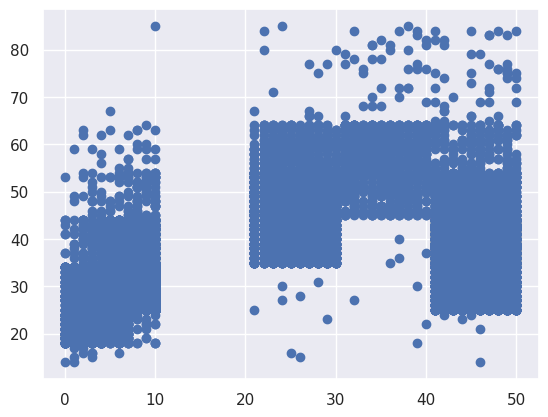

In [ ]:
plt.scatter(df['yrs_exp'],df['age']) # looks like there is a linear relationship between age and yrs of exp

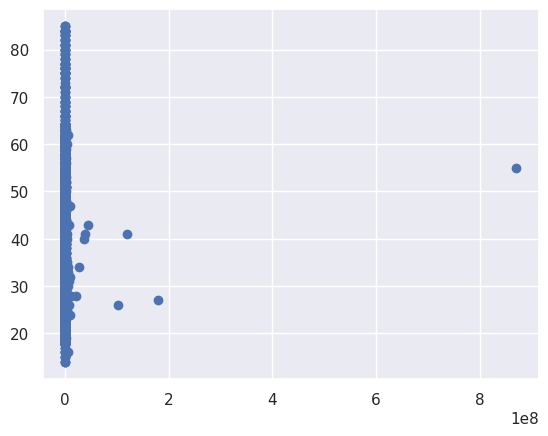

In [ ]:
plt.scatter(df['annual_salary'],df['age'])  # looks like there is no linear relationship between age and salary

### Multivariate normality

(array([  78.,  656., 3080., 3218.,  909.,  613.,  242.,   44.,   12.,
          10.]),
 array([-22.61849783, -15.84329033,  -9.06808283,  -2.29287532,
          4.48233218,  11.25753968,  18.03274718,  24.80795468,
         31.58316219,  38.35836969,  45.13357719]),
 <BarContainer object of 10 artists>)

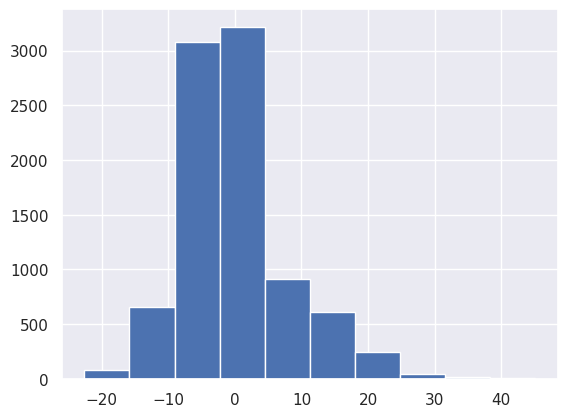

In [ ]:
# Residuals
residuals = y_test-y_pred
type(residuals)

plt.hist(residuals)

### Homoscedasticity
Let's compute the residuals and plot to a scatter graph and lets see if it looks random or not! #we want it to look random

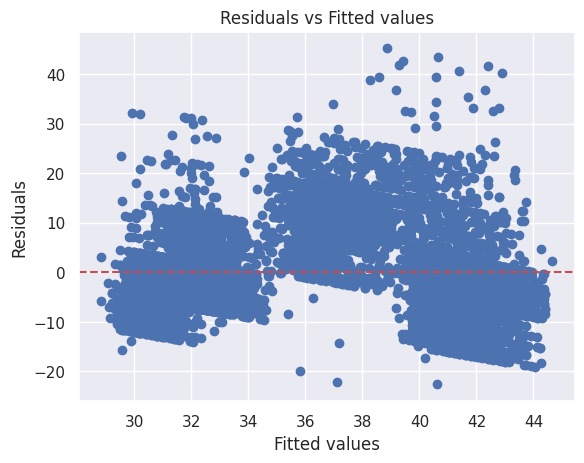

In [ ]:
# Predicted values
fitted_vals = y_pred

# Residuals
residuals = y_test-y_pred

# Plot
plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

### Multicollinearity

In [ ]:
x.corr() # since correlation coefficients are less than 1, we are ok.

,annual_salary,yrs_exp
annual_salary,1.000000,0.192137
yrs_exp,0.192137,1.000000


## MODEL 1: Add Predictors

In [ ]:
model1 = LinearRegression()

x = df1[['annual_salary','yrs_exp', 'yrs_exp_field']]
y = df1['age']

#train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("X_train data:",X_train.shape)
print("y_train data:",y_train.shape)
print("X_test data:",X_test.shape)
print("y_test data:",y_test.shape)

model1.fit( X_train,y_train ) #fit the model

y_pred = model1.predict(X_test)
print("y_pred data:", y_pred.shape)

X_train data: (17991, 3)
y_train data: (17991,)
X_test data: (8862, 3)
y_test data: (8862,)
y_pred data: (8862,)


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred) # closer to 0 is good. that means the predicted value from the actual value i
mse = metrics.mean_squared_error(y_test, y_pred) # closer to 0 is good.
rmse = np.sqrt(mse) # or mse**(0.5)  # closer to 0 is good.
r2 = metrics.r2_score(y_test,y_pred)  # closer to 1 is good. that means the model is able to fit

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4.704684384377332
MSE: 37.26634198897194
RMSE: 6.104616448964827
R-Squared: 0.5637278553582772


### Homoscedasticity
Let's compute the residuals and plot to a scatter graph and lets see if it looks random or not! #we want it to look random

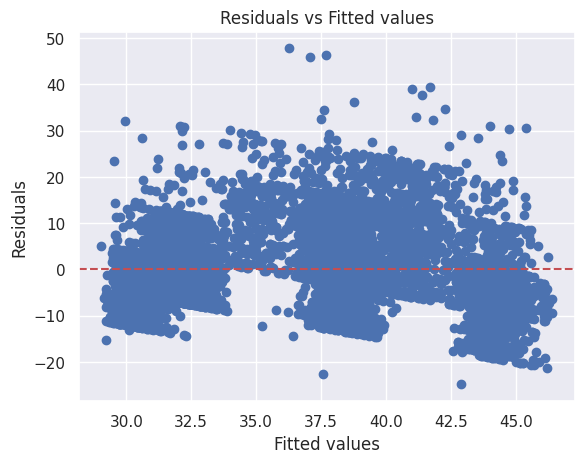

In [ ]:
# Predicted values
fitted_vals = y_pred

# Residuals
residuals = y_test-y_pred

# Plot
plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

### Heteroskedasticity
Heteroskedasticity in data complicates statistical analysis by causing varying levels of uncertainty across different values of predictors. This inconsistency can lead to biased estimates of relationships between variables and unreliable statistical tests. In practical terms, it undermines the accuracy of predictions and decisions made based on data, impacting the reliability of conclusions drawn from analyses. Addressing heteroskedasticity is crucial for ensuring that statistical models provide accurate insights and predictions.

